'\nimport tikzplotlib\ntikzplotlib.save("fspl_angle.tex")\n'

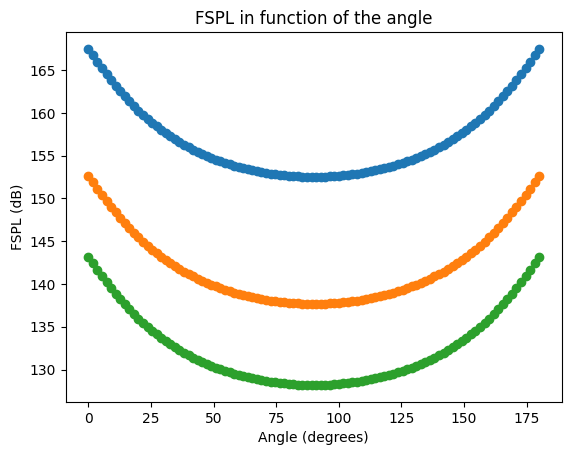

In [2]:
import numpy as np
import matplotlib.pyplot as plt

Re = 6378000 # m
hs = 420000 # m

def calculate_distance_to_satellite(angle, degrees=False):
    if degrees:
        angle = np.deg2rad(angle)
    return (Re*np.sin(angle)*-1) + np.sqrt((Re * np.sin(angle))**2+ 2*Re*hs + hs**2)

def calculate_fspl(distance, frequency):
    return 20*np.log10(4*np.pi*distance*frequency/299792458)

def calculate_fspl_angle(angle, frequency, degrees =False):
    if degrees:
        angle = np.deg2rad(angle)
    distance = calculate_distance_to_satellite(angle)
    return calculate_fspl(distance, frequency)


# Frequencies in Hz
frequencies = [2.4e9, 435e6, 146e6]

# Angles in degrees
angles = np.linspace(0, 180, 100)

for frequency in frequencies:
    fspl = []
    for angle in angles:
        distance = calculate_distance_to_satellite(angle, degrees=True)
        fspl.append(calculate_fspl(distance, frequency))
    plt.plot(angles, fspl, 'o-', label=f'{frequency/1e6:.1f} MHz')

plt.xlabel('Angle (degrees)')
plt.ylabel('FSPL (dB)')
plt.title('FSPL in function of the angle')

'''
import tikzplotlib
tikzplotlib.save("fspl_angle.tex")
'''



C:\Users\Jakob\AppData\Local\Temp\ipykernel_21232\423120379.py:7: RuntimeWarning: divide by zero encountered in divide
  return (G_max)*(np.cos((np.pi/2)*np.cos(theta))/np.sin(theta))**2
C:\Users\Jakob\AppData\Local\Temp\ipykernel_21232\423120379.py:12: RuntimeWarning: divide by zero encountered in divide
  return 10*np.log10(((np.cos((np.pi/2)*np.cos(theta))) /(np.sin(theta)))**2)+2.15


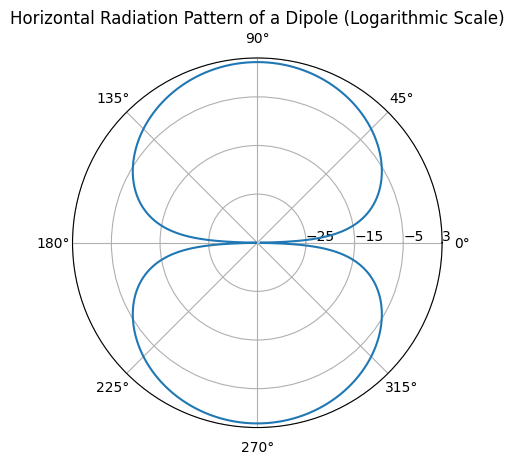

In [3]:
G_max = 1.68 # dBi

# Define the radiation pattern function for a dipole
def dipole_radiation_pattern(theta, degrees=False):
    if degrees:
        theta = np.deg2rad(theta)
    return (G_max)*(np.cos((np.pi/2)*np.cos(theta))/np.sin(theta))**2

def dipole_radiation_pattern_db(theta, degrees=False):
    if degrees:
        theta = np.deg2rad(theta)
    return 10*np.log10(((np.cos((np.pi/2)*np.cos(theta))) /(np.sin(theta)))**2)+2.15

# Define the range of angles to plot
angles = np.linspace(0, 2*np.pi, 3600)

# Calculate the radiation pattern for each angle
radiation_pattern = dipole_radiation_pattern(angles)
x = 10*np.log10(radiation_pattern)

radiation_pattern_db = dipole_radiation_pattern_db(angles)

# Plot the radiation pattern in a polar plot with a logarithmic scale
fig = plt.figure()
ax = fig.add_subplot(111, projection='polar')
ax.plot(angles, radiation_pattern_db)
ax.set_theta_zero_location('E')
ax.set_rlabel_position(0)
ax.set_rticks([-25, -15, -5,3])
ax.set_rlim(-35, 3)
ax.set_title('Horizontal Radiation Pattern of a Dipole (Logarithmic Scale)')
plt.show()



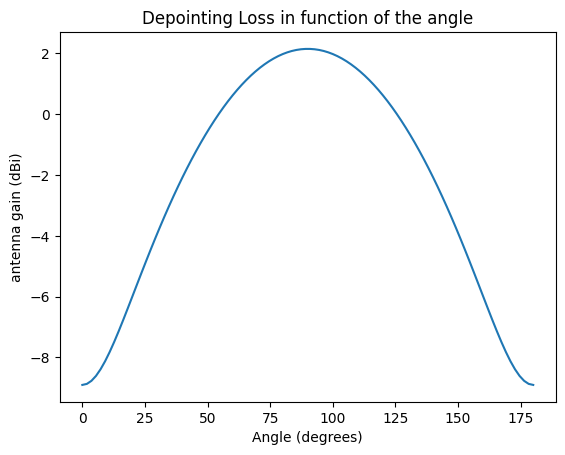

In [4]:
def calculate_depiontning_loss(epsilon, degrees=False):
    if degrees:
        epsilon = np.deg2rad(epsilon)
    n = np.arcsin((Re*np.cos(epsilon))/(Re+hs))
    return dipole_radiation_pattern_db((np.pi/2)-n)


angles = np.linspace(0, 180, 100)

loss = []
loss2 = []
for angle in angles:
    loss.append(calculate_depiontning_loss(angle, degrees=True))
plt.plot(angles, loss)
plt.xlabel('Angle (degrees)')
plt.ylabel('antenna gain (dBi)')
plt.title('Depointing Loss in function of the angle')

import tikzplotlib
tikzplotlib.save("depointing_loss.tex")

